In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data_path = 'C:/Users/punit/Downloads/Task 2 Breast Cancer Wisconsin (Diagnostic)/data.csv'
data = pd.read_csv(data_path)

In [3]:
# 1. Data Exploration
# Display the first few rows of the data
print("Data Head:")
print(data.head())

# Display basic statistics
print("\nData Info:")
print(data.info())

Data Head:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst 

In [4]:
print("\nData Description:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Data:")
print(data.isnull().sum())


Data Description:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064    

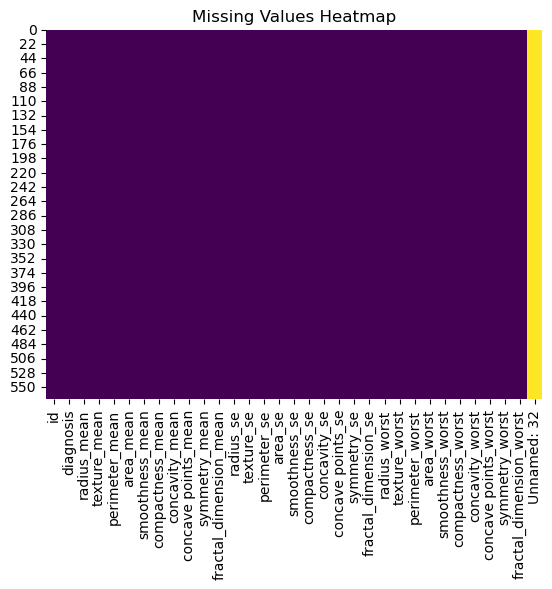

In [5]:
# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# 2. Data Preprocessing
# Drop the 'id' column as it is not a feature
data.drop(columns=['id','Unnamed: 32'], inplace=True)

In [7]:
# Convert 'diagnosis' to numerical format (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print("\nMissing Values After Processing:")
print(data.isnull().sum())

# Standardize the feature columns
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop(columns=['diagnosis'])), columns=data.columns[1:])
data_scaled['diagnosis'] = data['diagnosis']


Missing Values After Processing:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


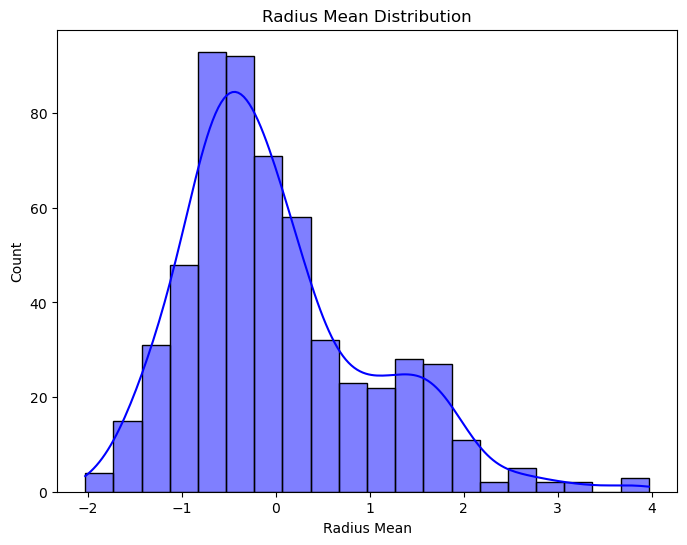

In [8]:
# Histogram for radius_mean distribution
plt.figure(figsize=(8, 6))
sns.histplot(data_scaled['radius_mean'], bins=20, kde=True, color='blue')
plt.title('Radius Mean Distribution')
plt.xlabel('Radius Mean')
plt.ylabel('Count')
plt.show()

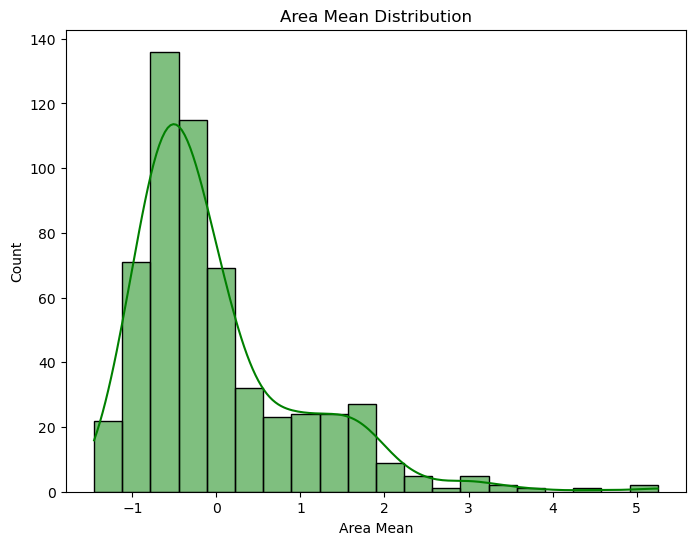

In [9]:
# Histogram for area_mean distribution
plt.figure(figsize=(8, 6))
sns.histplot(data_scaled['area_mean'], bins=20, kde=True, color='green')
plt.title('Area Mean Distribution')
plt.xlabel('Area Mean')
plt.ylabel('Count')
plt.show()


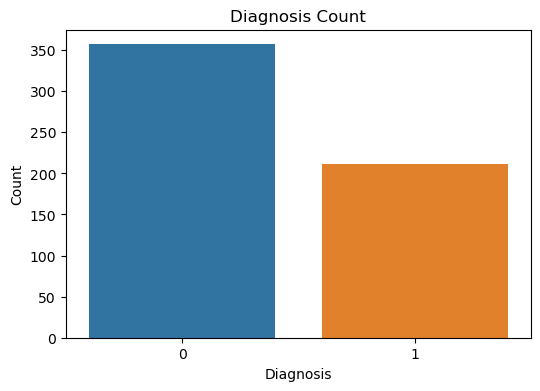

In [10]:
# Count plot for Diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data_scaled)
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [11]:
# Define features and target variable
X = data_scaled.drop('diagnosis', axis=1)
y = data_scaled['diagnosis']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 3. Model Building
# Initialize the models
logreg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42)

# Train the models
logreg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(random_state=42)

In [13]:
# 4. Model Evaluation
# Predict on the validation set
log_reg_preds = logreg.predict(X_val)
dec_tree_preds = decision_tree.predict(X_val)
rand_forest_preds = random_forest.predict(X_val)
grad_boost_preds = gradient_boosting.predict(X_val)
svm_preds = svm.predict(X_val)

# Define a function to print evaluation metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    return f1

# Evaluate and store F1 scores for each model
f1_scores = {
    "Logistic Regression": evaluate_model(y_val, log_reg_preds, "Logistic Regression"),
    "Decision Tree": evaluate_model(y_val, dec_tree_preds, "Decision Tree"),
    "Random Forest": evaluate_model(y_val, rand_forest_preds, "Random Forest"),
    "Gradient Boosting": evaluate_model(y_val, grad_boost_preds, "Gradient Boosting"),
    "SVM": evaluate_model(y_val, svm_preds, "SVM")
}

# Select the best model based on F1 score
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"\nBest Model: {best_model_name}")


Logistic Regression Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412

Decision Tree Evaluation:
Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1 Score: 0.9302325581395349

Random Forest Evaluation:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524

Gradient Boosting Evaluation:
Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score: 0.9411764705882352

SVM Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412

Best Model: Logistic Regression


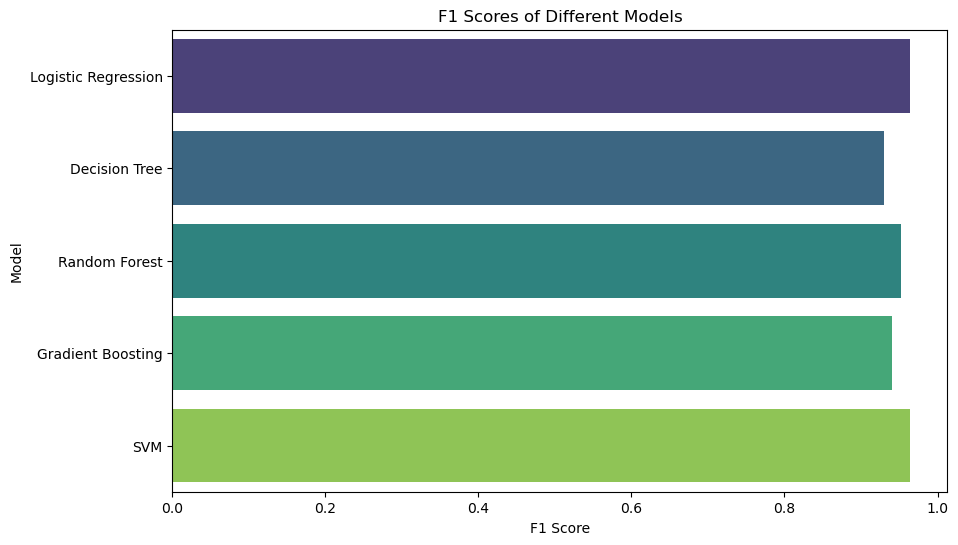

In [14]:
# F1 Scores Bar Plot
f1_scores_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=f1_scores_df, palette='viridis')
plt.title('F1 Scores of Different Models')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()

In [15]:
# 5. Model Tuning for the Best Model
if best_model_name == "Logistic Regression":
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']  # 'liblinear' supports both L1 and L2 penalties
    }
    model = LogisticRegression(max_iter=1000)
elif best_model_name == "Decision Tree":
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = DecisionTreeClassifier(random_state=42)
elif best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestClassifier(random_state=42)
elif best_model_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = GradientBoostingClassifier(random_state=42)
elif best_model_name == "SVM":
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }
    model = SVC(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [16]:
# Train the best model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the validation set with the best model
y_val_pred_best = best_model.predict(X_val)

# Evaluate the best tuned model
evaluate_model(y_val, y_val_pred_best, f"Tuned {best_model_name}")



Tuned Logistic Regression Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1 Score: 0.9655172413793104


0.9655172413793104

In [17]:
# Compare the predicted output with real output
comparison_df = pd.DataFrame({'Real': y_val, 'Predicted': y_val_pred_best})
print(comparison_df.head(10))

     Real  Predicted
204     0          0
70      1          1
131     1          1
431     0          0
540     0          0
567     1          1
369     1          1
29      1          1
81      0          1
477     0          0


In [18]:
# Make final predictions on the test set (using validation set as a proxy)
y_test_pred = best_model.predict(X_val)

In [19]:
# Create a DataFrame for the test predictions (to simulate a submission file)
submission = pd.DataFrame({'Id': np.arange(len(y_test_pred)), 'Predicted': y_test_pred})

# Save the submission file
submission_path = 'C:/Users/punit/Downloads/Task 2 Breast Cancer Wisconsin (Diagnostic)/submission.csv'
submission.to_csv(submission_path, index=False)
print(f"Submission file saved to: {submission_path}")



Submission file saved to: C:/Users/punit/Downloads/Task 2 Breast Cancer Wisconsin (Diagnostic)/submission.csv


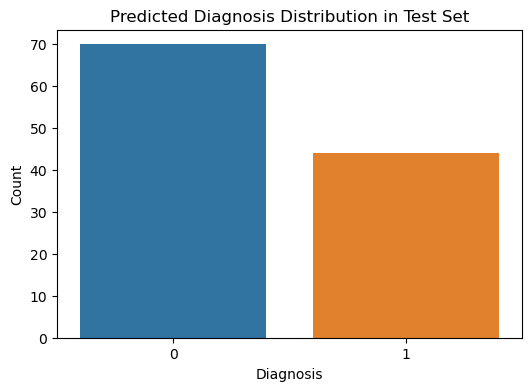

In [20]:
# Count plot for predicted outcomes in test set
plt.figure(figsize=(6, 4))
sns.countplot(x='Predicted', data=submission)
plt.title('Predicted Diagnosis Distribution in Test Set')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()